<a href="https://colab.research.google.com/github/faresedu/Modeling_with_Python/blob/main/Semana01_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pacote simbólico
import sympy
sympy.init_printing()

# geração dos símbolos
# s: variável de Laplace
# t: tempo
s, t = sympy.symbols('s t')

In [ ]:
# Função Transformada de Laplace
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

# Função Transformada de Laplace Inversa
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
# Tranformada de Laplace da entrada exp(-2*t)*2
F = L(sympy.exp(-2*t)*2)
F

  2  
─────
s + 2

In [ ]:
# Função Transferência do sistema
G = 1/(s**2 + 5*s + 4)
G

     1      
────────────
 2          
s  + 5⋅s + 4

In [ ]:
# resposta descrita no Domínio de Laplace
X = G*F
X

          2           
──────────────────────
        ⎛ 2          ⎞
(s + 2)⋅⎝s  + 5⋅s + 4⎠

In [ ]:
# Expansão em Frações Parciais da resposta
X.apart(s)

    1         1         2    
───────── - ───── + ─────────
3⋅(s + 4)   s + 2   3⋅(s + 1)

In [ ]:
# resposta temporal via Transformada Inversa de Laplace

invL(X)


⎛   3⋅t      2⋅t    ⎞  -4⋅t     
⎝2⋅ℯ    - 3⋅ℯ    + 1⎠⋅ℯ    ⋅θ(t)
────────────────────────────────
               3                

In [ ]:
# pacote para plotar gráficos
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letra

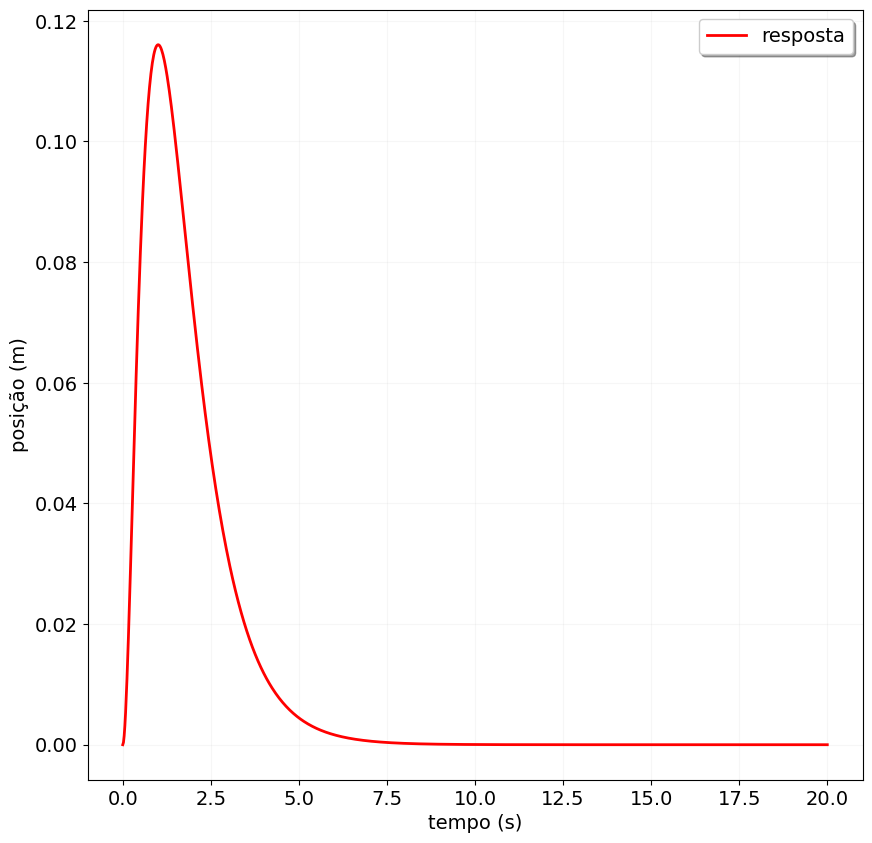

In [ ]:
# plotar a resposta encontrada
t = np.linspace(0, 20, 1001) # vetor tempo de 0 a 20 segundos com 1001 pontos
u = 2/3*(np.exp(-1*t))-1*(np.exp(-2*t))+1/3*(np.exp(-4*t)) # vetor resposta de acordo com o simbólico

# figura
plt.plot(t, u, 'r', linewidth=2, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.1)
plt.ylabel('posição (m)')
plt.xlabel('tempo (s)')
plt.show()